# **DATA** **PREPARATION**

# Data Exploration

In [0]:
import pandas as pd #import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dataset = pd.read_csv("used_cars.csv") #baca dataset
dataset.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [0]:
dataset.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,20001.000000,2.000100e+04,2.000100e+04,19989.000000,1.761200e+04,0.0,18970.000000,18970.000000
mean,10000.000000,7.043199e+09,7.664058e+04,2009.830657,9.916435e+04,NaN,40.394737,-86.300395
std,5773.935703,4.668820e+06,8.335762e+06,7.913613,7.963487e+04,NaN,4.440290,18.219242
min,0.000000,7.032597e+09,0.000000e+00,1917.000000,0.000000e+00,NaN,-51.812200,-155.901000
25%,5000.000000,7.040114e+09,3.970000e+03,2007.000000,5.013300e+04,NaN,37.273700,-80.166800
50%,10000.000000,7.043866e+09,8.795000e+03,2011.000000,9.389900e+04,NaN,38.258600,-77.514200
75%,15000.000000,7.047065e+09,1.749500e+04,2015.000000,1.339090e+05,NaN,44.439500,-76.238400
max,20000.000000,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06,NaN,59.746600,9.095700


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    20001 non-null  int64  
 1   id            20001 non-null  int64  
 2   url           20001 non-null  object 
 3   region        20001 non-null  object 
 4   region_url    20001 non-null  object 
 5   price         20001 non-null  int64  
 6   year          19989 non-null  float64
 7   manufacturer  19296 non-null  object 
 8   model         19736 non-null  object 
 9   condition     10849 non-null  object 
 10  cylinders     12916 non-null  object 
 11  fuel          19928 non-null  object 
 12  odometer      17612 non-null  float64
 13  title_status  19891 non-null  object 
 14  transmission  19811 non-null  object 
 15  vin           13356 non-null  object 
 16  drive         15359 non-null  object 
 17  size          6886 non-null   object 
 18  type          16342 non-nu

In [0]:
#framing dataset untuk memudahkan membaca fitur-fiturnya
#dari korelasi cari fitur yang mendekati ke angka 1
df = pd.DataFrame(dataset, columns=['id','price','year','condition','fuel','odometer'])
df 

,id,price,year,condition,fuel,odometer
0,7034441763,17899,2012.0,excellent,gas,63500.0
1,7034440610,0,2016.0,excellent,gas,10.0
2,7034440588,46463,2015.0,excellent,gas,7554.0
3,7034440546,0,2016.0,excellent,gas,10.0
4,7034406932,49999,2018.0,NaN,diesel,70150.0
...,...,...,...,...,...,...
19996,7049052853,49999,2016.0,NaN,diesel,43406.0
19997,7049052797,12127,2018.0,NaN,gas,32867.0
19998,7049049369,0,2019.0,NaN,gas,17514.0
19999,7049042761,14661,2017.0,NaN,gas,30486.0


In [0]:
df.describe() #mengecek missing value

,id,price,year,odometer
count,2.000100e+04,2.000100e+04,19989.000000,1.761200e+04
mean,7.043199e+09,7.664058e+04,2009.830657,9.916435e+04
std,4.668820e+06,8.335762e+06,7.913613,7.963487e+04
min,7.032597e+09,0.000000e+00,1917.000000,0.000000e+00
25%,7.040114e+09,3.970000e+03,2007.000000,5.013300e+04
50%,7.043866e+09,8.795000e+03,2011.000000,9.389900e+04
75%,7.047065e+09,1.749500e+04,2015.000000,1.339090e+05
max,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06


In [0]:
df.isna().sum()

id              0
price           0
year           12
condition    9152
fuel           73
odometer     2389
dtype: int64

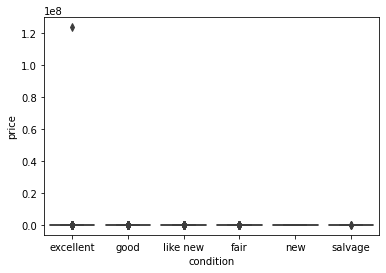

In [0]:
#cek outliers difitur yang digunakan
sb.boxplot(x="condition", y="price", data=df)

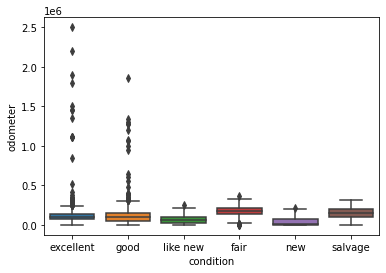

In [0]:
sb.boxplot(x="condition", y="odometer", data=df)

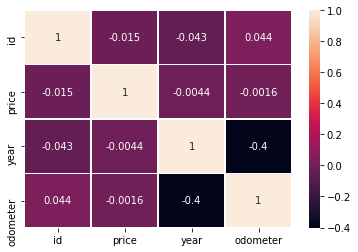

In [0]:
#mengetahui korelasi untuk fitur yang akan digunakan
corr = df.corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=0.5)

# Data Cleansing

In [0]:
df = df.dropna(subset=['condition']) #drop kolom kondisi yang valuenya nan, karena yang dibutuhkan hanya fitur condition
df.isnull().sum() #cek jumlah kolom yang masih ada nullnya, jika hasilnya 0 semua maka data yang nan berhasil terisi

id              0
price           0
year            0
condition       0
fuel            0
odometer     1135
dtype: int64

In [0]:
#isi data yang masih kosong dengan angka nol
df = df.fillna(0)
df.isnull().sum()

id           0
price        0
year         0
condition    0
fuel         0
odometer     0
dtype: int64

In [0]:
df.describe() #cek jumlah data apakah masih ada missing value

,id,price,year,odometer
count,1.084900e+04,1.084900e+04,10849.000000,1.084900e+04
mean,7.043356e+09,2.252277e+04,2008.705226,9.796045e+04
std,4.526263e+06,1.185211e+06,8.251963,9.131966e+04
min,7.032597e+09,0.000000e+00,1917.000000,0.000000e+00
25%,7.040178e+09,4.495000e+03,2006.000000,3.880000e+04
50%,7.043932e+09,7.997000e+03,2010.000000,9.659800e+04
75%,7.047122e+09,1.560000e+04,2014.000000,1.402100e+05
max,7.050101e+09,1.234568e+08,2020.000000,2.500005e+06


In [0]:
quantile_95 = df['price'].quantile(0.95) #hilangknan outliers dengan metode IQR dengan mencari quartile dari data
df_95 = df[df['price'] < quantile_95]
len(df_95) #panjang data disimpan di variabel df_95

10305

In [0]:
df_95.to_csv('dataWO_outlierPrice.csv') #fitur yang sudah discaling dimasukkan ke csv baru

In [0]:
#fitur yang sudah tidak ada outliernya dimasukkan ke csv baru dan simpan di variabel dataset
dataset = pd.read_csv('dataWO_outlierPrice.csv')
dataset

,Unnamed: 0,id,price,year,condition,fuel,odometer
0,0,7034441763,17899,2012.0,excellent,gas,63500.0
1,1,7034440610,0,2016.0,excellent,gas,10.0
2,3,7034440546,0,2016.0,excellent,gas,10.0
3,22,7034366554,9500,2001.0,good,diesel,0.0
4,24,7034278551,4600,2008.0,good,gas,110982.0
...,...,...,...,...,...,...,...
10300,19927,7049187416,11995,2017.0,like new,gas,35050.0
10301,19944,7049187695,18995,2019.0,excellent,gas,4100.0
10302,19952,7049116126,12000,2004.0,excellent,diesel,196700.0
10303,19961,7049141967,11500,2017.0,like new,gas,27415.0


In [0]:
quantile = dataset['odometer'].quantile(0.95) #hilangkan outliers dengan metode IQR dengan mencari quartile dari data
df_baru = dataset[dataset['odometer'] < quantile]
len(df_baru) #panjang data disimpan di variabel df_baru

9786

In [0]:
df_baru.to_csv('dataWO_OutlierPriceOdo.csv') #fitur yang sudah discaling dimasukkan ke csv baru

In [0]:
#fitur yang sudah tidak ada outliernya dimasukkan ke csv baru dan simpan di variabel datafix
datafix = pd.read_csv('dataWO_OutlierPriceOdo.csv')
datafix

,Unnamed: 0,Unnamed: 0.1,id,price,year,condition,fuel,odometer
0,0,0,7034441763,17899,2012.0,excellent,gas,63500.0
1,1,1,7034440610,0,2016.0,excellent,gas,10.0
2,2,3,7034440546,0,2016.0,excellent,gas,10.0
3,3,22,7034366554,9500,2001.0,good,diesel,0.0
4,4,24,7034278551,4600,2008.0,good,gas,110982.0
...,...,...,...,...,...,...,...,...
9781,10300,19927,7049187416,11995,2017.0,like new,gas,35050.0
9782,10301,19944,7049187695,18995,2019.0,excellent,gas,4100.0
9783,10302,19952,7049116126,12000,2004.0,excellent,diesel,196700.0
9784,10303,19961,7049141967,11500,2017.0,like new,gas,27415.0


In [0]:
datafix.describe()

,Unnamed: 0,Unnamed: 0.1,id,price,year,odometer
count,9786.000000,9786.000000,9.786000e+03,9786.000000,9786.000000,9786.000000
mean,5134.037503,9225.702125,7.043340e+09,9966.563458,2008.753934,90507.263846
std,2988.587676,5625.830771,4.514716e+06,7133.065290,8.019875,58009.828719
min,0.000000,0.000000,7.032597e+09,0.000000,1917.000000,0.000000
25%,2518.500000,3849.750000,7.040179e+09,4500.000000,2006.000000,41093.000000
50%,5135.500000,9082.500000,7.043910e+09,7995.000000,2010.000000,96006.000000
75%,7736.750000,14246.500000,7.047084e+09,14900.000000,2014.000000,135000.000000
max,10304.000000,19994.000000,7.050101e+09,29495.000000,2020.000000,209835.000000


In [0]:
#pilih fitur yang akan digunakan lalu simpan divariabel dfw
dfw = pd.DataFrame(datafix, columns=['id','price','odometer','condition'])
dfw

,id,price,odometer,condition
0,7034441763,17899,63500.0,excellent
1,7034440610,0,10.0,excellent
2,7034440546,0,10.0,excellent
3,7034366554,9500,0.0,good
4,7034278551,4600,110982.0,good
...,...,...,...,...
9781,7049187416,11995,35050.0,like new
9782,7049187695,18995,4100.0,excellent
9783,7049116126,12000,196700.0,excellent
9784,7049141967,11500,27415.0,like new


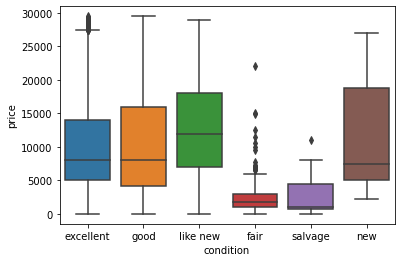

In [0]:
#cek apakah outlier masih ada setelah dilakukan cleansing
sb.boxplot(x="condition", y="price", data=dfw)

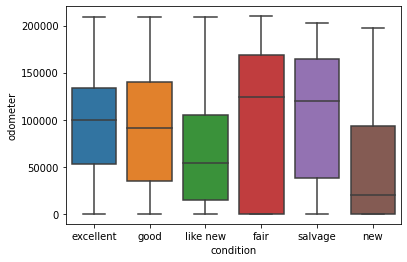

In [0]:
sb.boxplot(x="condition", y="odometer", data=dfw)

# Data training

In [0]:
#training data
from sklearn.model_selection import train_test_split
dataB = np.array(pd.DataFrame(dfw, columns=['condition'])) #kolom kondisi disimpan di variabel dataB dengan bentuk array
dataB

array([['excellent'],
       ['excellent'],
       ['excellent'],
       ...,
       ['excellent'],
       ['like new'],
       ['good']], dtype=object)

In [0]:
dataTrain = np.array(pd.DataFrame(dfw, columns=['price','odometer'])) #kolom price dan year disimpan di variabel dataTrain dengan bentuk array
dataTrain

array([[1.7899e+04, 6.3500e+04],
       [0.0000e+00, 1.0000e+01],
       [0.0000e+00, 1.0000e+01],
       ...,
       [1.2000e+04, 1.9670e+05],
       [1.1500e+04, 2.7415e+04],
       [2.2000e+03, 1.7900e+05]])

In [0]:
#split dataB2, dataB dengan size 20% dan merandom data sebanyak 200 kali
#pada tahap ini random state dan size bisa diubah untuk meningkatkan nilai akurasi
X_train, X_test, y_train, y_test = train_test_split(dataTrain, dataB, test_size=0.20, random_state=200)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7828, 2)
(7828, 1)
(1958, 2)
(1958, 1)


# scalling

In [0]:
#scalling dengan metode standard scale mengguanakan min dan max
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

#scalling dengan minmax scaller
min_max_scaler =MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)

In [0]:
X_test_scaled = min_max_scaler.transform(X_test)

# **CLASSIFICATION**

# CLASSIFICATION dengan SVM dengan scalling

In [0]:
#klasifikasi dengan algoritma SVM
from sklearn.svm import SVC

clf = SVC (gamma='auto')
clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#hasil prediksi X_test disimpan divariabel result
result = clf.predict(X_test_scaled)
result

array(['excellent', 'good', 'excellent', ..., 'excellent', 'excellent',
       'good'], dtype=object)

In [0]:
clf.score(X_train_scaled, y_train)*100

52.82319877363311

In [0]:
clf.score(X_test_scaled, y_test)*100

54.80081716036772

# Classification dengan naive bayes

In [0]:
#klasifikasi dengan algoritma naive bayes yang kategorikal
from sklearn.naive_bayes import CategoricalNB
cl = CategoricalNB()
cl.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
#hasil prediksi X_test disimpan divariabel hasil
hasil = cl.predict(X_test_scaled)
hasil

array(['excellent', 'excellent', 'excellent', ..., 'excellent',
       'excellent', 'excellent'], dtype='<U9')

In [0]:
cl.score(X_train_scaled, y_train)

0.5258048032703116

In [0]:
cl.score(X_test_scaled, y_test)

0.5459652706843718

# cek akurasi

In [0]:
#cek akurasi dengan algoritma SVM
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, result))

              precision    recall  f1-score   support

   excellent       0.55      0.95      0.70      1069
        fair       0.00      0.00      0.00        53
        good       0.46      0.07      0.13       726
    like new       0.00      0.00      0.00       106
         new       0.00      0.00      0.00         1
     salvage       0.00      0.00      0.00         3

    accuracy                           0.55      1958
   macro avg       0.17      0.17      0.14      1958
weighted avg       0.47      0.55      0.43      1958



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#cek akurasi dengan algoritma naive bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

   excellent       0.55      1.00      0.71      1069
        fair       0.00      0.00      0.00        53
        good       0.00      0.00      0.00       726
    like new       0.00      0.00      0.00       106
         new       0.00      0.00      0.00         1
     salvage       0.00      0.00      0.00         3

    accuracy                           0.55      1958
   macro avg       0.09      0.17      0.12      1958
weighted avg       0.30      0.55      0.39      1958



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Classification dengan SVM dengan tidak melakukan scalling

In [0]:
clfn = SVC (gamma='auto')
clfn.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
clfn.score(X_train, y_train)*100

96.5763924374042

In [0]:
clfn.score(X_test, y_test)*100

66.34320735444331

# Classification dengan naive bayes dengan tidak melakukan scalling

In [0]:
cln = CategoricalNB()
cln.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
cln.score(X_train, y_train)

0.7782319877363311

In [0]:
cln.score(X_test, y_test)

0.6961184882533197

# kesimpulan

kesimpulan yang saya dapatkan setelah melakukan proses ini yaitu algoritma SVM maupun naive bayes memiliki kelebihan dan kekurangannya masing-masing, dan untuk masalah ini lebih baik menggunakan algoritma SVM karena memiliki nilai akurasi yang lebih tinggi dari algoritma naive bayes